In [1]:
import os
import sys
PACKAGE_PATH = '/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.6/site-packages'
if not PACKAGE_PATH in sys.path:
    sys.path.append(PACKAGE_PATH)

In [2]:
import import_ipynb
import numpy as np
import os
from PIL import Image

from data import downloadData as dd
from models import cnnModel as cn
from services import modelService

importing Jupyter notebook from /home/ec2-user/SageMaker/CnnMathematicalFunctions/data/downloadData.ipynb
importing Jupyter notebook from /home/ec2-user/SageMaker/CnnMathematicalFunctions/models/cnnModel.ipynb
importing Jupyter notebook from /home/ec2-user/SageMaker/CnnMathematicalFunctions/services/modelService.ipynb


In [5]:
class MathematicalFunctionsCNN:

    train_dir = 'data/train'
    test_dir = 'data/test'
    val_dir = 'data/val'
    model = ''
    model_path = 'results/cnn.h5'

    def __main__(self):
        #if len(os.listdir('data')) < 4:
        #    dd.importImages()
        #    dd.applyDataAugmentation(self.train_dir, 90)
        #else:     
        #    ms.createRandomLinearFunctions(50, 'test')
        #    ms.createRandomSquaredFunctions(50, 'test')
        #if os.path.isfile(self.model_path):
        #    self.model = ms.loadModel(self.model_path)
        #    self.model.summary()
        ms = modelService.modelService()
        self.model = cn.create_Model()
        self.model.summary()
        collected_callbacks = cn.collect_callbacks()
        cn.fit_model(self.model, self.train_dir, self.val_dir, collected_callbacks)
        test_images = ms.get_random_test_images(self.test_dir, 3)
        cn.predict_images(test_images, self.model)
        ms.saveModel(self.model, self.model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

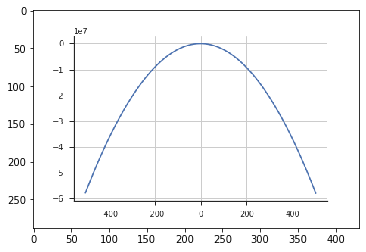

This mathematical function is squared [1.]


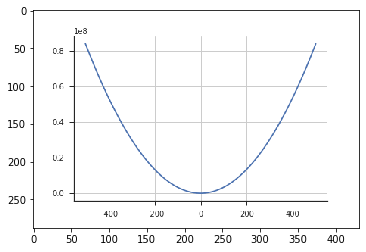

This mathematical function is squared [1.]


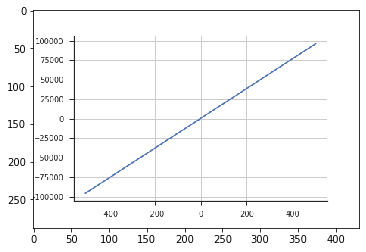

This mathematical function is linear [0.]


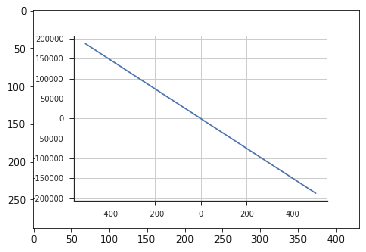

This mathematical function is linear [0.]


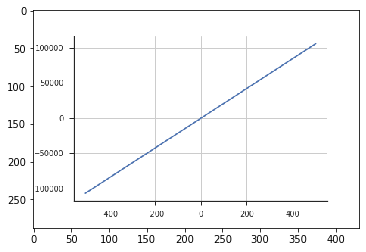

This mathematical function is linear [0.]


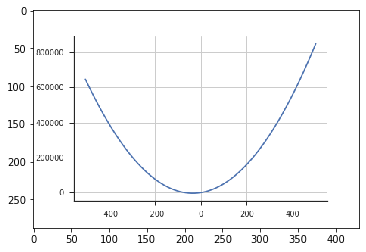

This mathematical function is squared [1.]


In [4]:
model = MathematicalFunctionsCNN()
model.__main__()